In [1]:
#Importing necessary lib
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

[Errno 2] No such file or directory: 'dataset'
/scratch/vnguye88/dataset


In [4]:
ds_1 = xr.open_dataset('SNDR.AIRS.AQUA.20090501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101941.nc')
ds_2 = xr.open_dataset('SNDR.AIRS.AQUA.20100501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101943.nc')
ds_3 = xr.open_dataset('SNDR.AIRS.AQUA.20110501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101943.nc')
ds_4 = xr.open_dataset('SNDR.AIRS.AQUA.20120501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101943.nc')
ds_5 = xr.open_dataset('SNDR.AIRS.AQUA.20130501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101947.nc')
ds_6 = xr.open_dataset('SNDR.AIRS.AQUA.20140501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101947.nc')
ds_7 = xr.open_dataset('SNDR.AIRS.AQUA.20150501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101948.nc')
ds_8 = xr.open_dataset('SNDR.AIRS.AQUA.20160501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101951.nc')
ds_9 = xr.open_dataset('SNDR.AIRS.AQUA.20170501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101952.nc')
ds_10 = xr.open_dataset('SNDR.AIRS.AQUA.20180501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101952.nc')
ds_11 = xr.open_dataset('SNDR.AIRS.AQUA.20190501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101953.nc')
ds_12 = xr.open_dataset('SNDR.AIRS.AQUA.20200501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101953.nc')

/tmp/ipykernel_1612681/3764357526.py:1: FutureWarning: In a future version, xarray will not decode the variable 'orbit_pass' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ds_1 = xr.open_dataset('SNDR.AIRS.AQUA.20090501.D01.L3_CONUS_SSDF_NSAT.std.v02_42_00.J.202205101941.nc')
/tmp/ipykernel_1612681/3764357526.py:2: FutureWarning: In a future version, xarray will not decode the variable 'orbit_pass' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attrib

In [5]:
print(ds_1) #test data
#create an array/list for data
datasets = [ds_1, ds_2, ds_3, ds_4, ds_5, ds_6, ds_7, ds_8, ds_9, ds_10, ds_11, ds_12]
#list all the available years
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

<xarray.Dataset> Size: 398kB
Dimensions:               (orbit_pass: 2, lat: 101, lon: 245, utc_tuple: 8)
Coordinates:
  * orbit_pass            (orbit_pass) timedelta64[ns] 16B 13:30:00 01:30:00
  * lat                   (lat) float32 404B 25.0 25.25 25.5 ... 49.5 49.75 50.0
  * lon                   (lon) float32 980B -125.0 -124.8 ... -64.25 -64.0
    utc_tuple_lbl         (utc_tuple) <U11 352B ...
Dimensions without coordinates: utc_tuple
Data variables:
    surf_air_temp         (orbit_pass, lat, lon) float32 198kB ...
    surf_air_temp_stderr  (orbit_pass, lat, lon) float32 198kB ...
    obs_time_utc          (orbit_pass, utc_tuple) float32 64B ...
    obs_time_tai93        (orbit_pass) datetime64[ns] 16B ...
    num_obs_aqua          (orbit_pass) float64 16B ...
    num_obs_snpp          (orbit_pass) float64 16B ...
Attributes: (12/73)
    keywords:                          ATMOSPHERE > ATMOSPHERIC TEMPERATURE
    Format:                            netCDF
    Conventions:        

/home/vnguye88/miniforge/envs/clim680/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


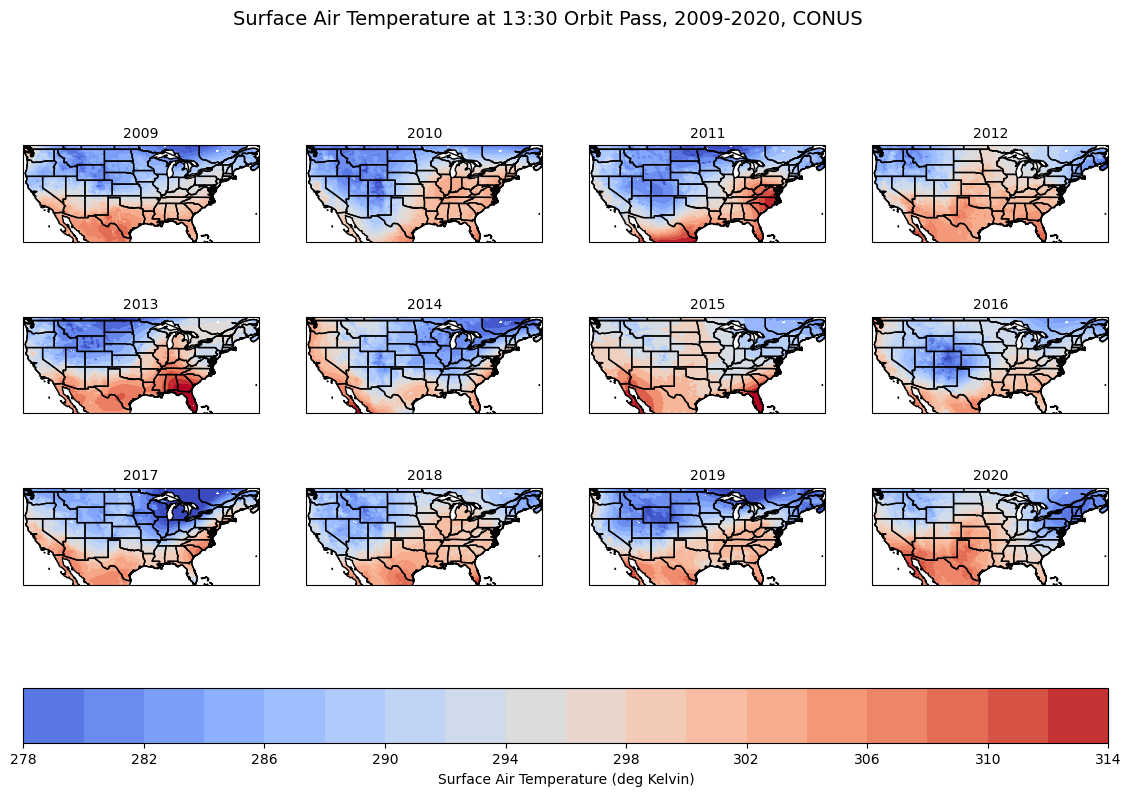

In [23]:
# Define Lat and Lon Grid
lat = ds_1["lat"]
lon = ds_1["lon"]
lon2d, lat2d = np.meshgrid(lon,lat)

#Create figure and map-bases subplot
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(14, 9), subplot_kw={'projection': ccrs.PlateCarree()})

#add color...
vmin, vmax =275, 315
cmap = "coolwarm"

#flatten for easier understanding

axs= axs.flatten()

#Loops

for i, (ax, ds, year) in enumerate (zip(axs, datasets, years)):  #looping through each axes - year - data to get index and draw map on
    data = ds['surf_air_temp'].sel(orbit_pass ="13:30:00") #choosing surface temperature at the exact time for each dataset
    
    #Fill in each subplot with projection and data
    image = ax.contourf(lon2d, lat2d, data, levels=20, cmap =cmap, vmin=vmin, vmax=vmax, transform =ccrs.PlateCarree()) #take lat and lon from lon2d and lat2d, data list created above, 
    # 20 gradient steps, cmap = color scheme, min-max color scale
    
    #add map features for all
    ax.add_feature(feature.COASTLINE)
    ax.add_feature(feature.BORDERS) #to draw borderline of the US
    ax.add_feature(feature.STATES) #to add Stateline 
    ax.set_extent([-125, -64, 25, 50], crs=ccrs.PlateCarree()) #zoom in to CONUS
    ax.set_title(str(year), fontsize=10)

# Add colorbar
cbar = fig.colorbar(image, ax= axs, orientation ='horizontal')
cbar.set_label("Surface Air Temperature (deg Kelvin)")
plt.suptitle("Surface Air Temperature at 13:30 Orbit Pass, 2009-2020, CONUS", fontsize =14)

plt.show()